<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/LAB10_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Regularization

Imposing certain limitations on the regression coefficients making the model more resistant to overfitting


Example 1. Regularization with artificial data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

In [2]:
#generate random data repeating regressors with minor fluctuations
M = 20 #size of the training, validation and test samples
np.random.seed(1)

X = pd.DataFrame(np.random.randn(3*M,3)) #observations for three random input variables (features)
Y = X.sum(axis = 1) + np.random.randn(3*M) #add a target variable as a sum of the three features and some noise
data = pd.concat([Y,X]+[X+0.01*np.random.randn(3*M,3) for i in range(4)], axis = 1)  # add four duplicates of the features with minor noise and stack Y and X into a single dataframe
data.columns = ['Y'] + ['x%d'%(i+1) for i in range(data.shape[1]-1)]         # name the columns
#split into training, test and validation sets
dataTrain=data.iloc[:M,:]
dataTest=data.iloc[M:2*M,:]
dataValid=data.iloc[2*M:,:]

In [3]:
dataTrain.head() #training data structure (15 features)

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,-0.788142,1.624345,-0.611756,-0.528172,1.619363,-0.614866,-0.528191,1.622058,-0.595623,-0.531920,1.613616,-0.606805,-0.537692,1.631123,-0.622822,-0.531764
1,-2.195552,-1.072969,0.865408,-2.301539,-1.086935,0.856794,-2.294792,-1.080468,0.885954,-2.301005,-1.078150,0.850794,-2.306702,-1.067915,0.877587,-2.320946
2,1.805829,1.744812,-0.761207,0.319039,1.750997,-0.765639,0.337144,1.740020,-0.757705,0.319211,1.748323,-0.761895,0.305561,1.736750,-0.760716,0.313078
3,0.445823,-0.249370,1.462108,-2.060141,-0.262428,1.458658,-2.062449,-0.253662,1.474193,-2.048984,-0.234663,1.465480,-2.050060,-0.240754,1.441244,-2.056523
4,0.316851,-0.322417,-0.384054,1.133769,-0.350348,-0.364679,1.137433,-0.314009,-0.385083,1.145238,-0.314565,-0.390703,1.114319,-0.318158,-0.383564,1.144792


In [4]:
#perform a regression of the target variable against those three features we used to compute it
lm = smf.ols(formula = 'Y ~ x1+x2+x3', data = dataTrain).fit()
OLS_coef=lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     17.79
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.38e-05
Time:                        00:28:34   Log-Likelihood:                -23.431
No. Observations:                  20   AIC:                             54.86
Df Residuals:                      16   BIC:                             58.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3465      0.197      1.757      0.0

In [5]:
#now perform the regression over all the 15 features including noisy duplicates
#use "join" to engineer a string regression formulae, stacking together feature names adding '+' in between
lm2 = smf.ols(formula = 'Y ~ '+ '+'.join(dataTrain.columns[1:]), data = dataTrain).fit()
OLS_coef=lm2.params
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3.715
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.107
Time:                        00:28:43   Log-Likelihood:                -11.065
No. Observations:                  20   AIC:                             54.13
Df Residuals:                       4   BIC:                             70.06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1937      0.608      0.318      0.7

In [6]:
from sklearn.metrics import r2_score

In [7]:
#indeed the test R2 is negative this way
r2_score(dataTest.Y,lm2.predict(dataTest))

-0.8927084960998399

In [8]:
lm2.params

,0
Intercept,0.193676
x1,-9.263060
x2,-32.409580
x3,-134.625216
x4,-11.160992
x5,-21.131152
x6,102.037978
x7,-25.407631
x8,4.826498
x9,-40.708135


In [9]:
#try Ridge with an arbitrary regularization parameter alpha=1
Ridge=linear_model.Ridge(fit_intercept=True, alpha=1)
Ridge.fit(dataTrain.iloc[:,1:],dataTrain.Y)
# In sample:
YPred_IS=Ridge.predict(dataTrain.iloc[:,1:])
print("The IS R-squared of Ridge is: {0}".format(r2_score(dataTrain.Y,YPred_IS)))
Ridge.coef_

The IS R-squared of Ridge is: 0.769666378885421


array([0.1896624 , 0.24722858, 0.18132605, 0.21763589, 0.24170847,
       0.17970417, 0.15691973, 0.22943271, 0.11503989, 0.19477322,
       0.28970272, 0.23323684, 0.19730613, 0.2294736 , 0.19280885])

In [10]:
#Out of sample
YPred_OS=Ridge.predict(dataTest.iloc[:,1:])
print("The OS R-squared of Ridge is: {0}".format(r2_score(dataTest.Y,YPred_OS)))

The OS R-squared of Ridge is: 0.3431169851850969


In [11]:
#try Lasso with an another arbitrary regularization parameter alpha=0.01 (if we try alpha=1 this turns out to be too much regularization already)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=0.1)

Lasso.fit(dataTrain.iloc[:,1:],dataTrain.Y)
# In sample:
YPred_IS=Lasso.predict(dataTrain.iloc[:,1:])
print("The IS R-squared of Lasso is: {0}".format(r2_score(dataTrain.Y,YPred_IS)))
#Out of sample
YPred_OS=Lasso.predict(dataTest.iloc[:,1:])
print("The OS R-squared of Lasso is: {0}".format(r2_score(dataTest.Y,YPred_OS)))
Lasso.coef_

The IS R-squared of Lasso is: 0.7545180291370721
The OS R-squared of Lasso is: 0.41632294784987245


array([0.        , 0.        , 0.        , 0.80668997, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.02567708, 0.81067886, 0.        , 0.        , 0.        ])

In [12]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_alpha(model,X_train,y_train,X_valid,y_valid,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #alphas: a list of alpha values to try
    #Graph: plot the graph of R^2 values for different alpha

    R_2_OS=[] #out of sample R2's

    #initialize the model to use for each given alpha
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'

    best_R2 = -1
    best_alpha = alphas[0]
    best_coefs = []

    for a in alphas: #for all alphas to try
        lm = RM(a) #assign the model
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample
        R_2_OS_=r2_score(y_valid,y_predict)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2: #if current OS R2 is the best - update the best solution
            best_R2 = R_2_OS_
            best_alpha = a
            best_coefs = lm.coef_

    if Graph==True: #visualization of the performance depending on alpha
        plt.title('OS-R-squared for different Alpha')
        if logl: #log-scale
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.ylim((-0.1,1))
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()

    return [best_alpha,best_R2,best_coefs]

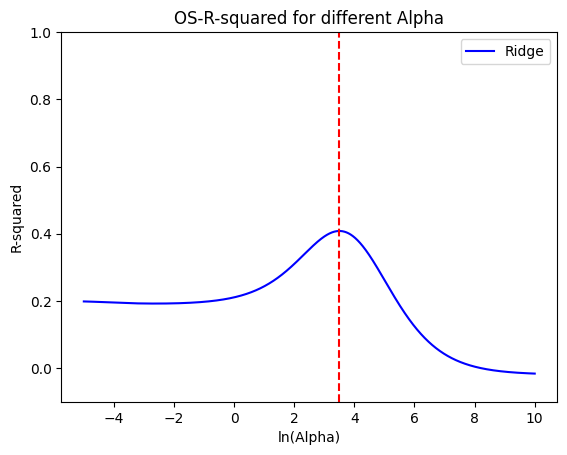

Optimal alpha for Ridge=33.16019248594952, best OS R_2=0.4081703394189097


In [13]:
alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.Y,dataValid.iloc[:,1:],dataValid.Y,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [14]:
Lasso=linear_model.Lasso(fit_intercept=True, alpha=alpha_optimal)

Lasso.fit(dataTrain.iloc[:,1:],dataTrain.Y)
# In sample:
YPred_IS=Lasso.predict(dataTrain.iloc[:,1:])
print("The IS R-squared of Lasso is: {0}".format(r2_score(dataTrain.Y,YPred_IS)))
#Out of sample
YPred_OS=Lasso.predict(dataTest.iloc[:,1:])
print("The OS R-squared of Lasso is: {0}".format(r2_score(dataTest.Y,YPred_OS)))
Lasso.coef_

The IS R-squared of Lasso is: 0.0
The OS R-squared of Lasso is: -0.044755641175038496


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


Homework (extracredit)

Recall the polynomial regression from previous class and try lasso for degree selection.

First recreate the data

In [15]:
#generate data and put it in the dataframe
np.random.seed(2018)
x=np.arange(-10,20,0.5)
y=x**4/100+x**3/20+x**2/3+2*x+np.random.normal(loc=0,scale=3,size=60)
data2=pd.DataFrame({'x':x,'y':y}) #create a dataframe
#slice the data in three pieces (we'll talk about those later)
data2.head() #for now let's stick with this first one

,x,y
0,-10.0,62.503031
1,-9.5,51.410761
2,-9.0,44.605198
3,-8.5,24.739247
4,-8.0,22.200164


In [16]:
data2 = data2.reindex(['y','x'], axis=1)

In [17]:
M=10
for p in range(2,M+1): #add more powers of x up to 10'th
    data2['x%d'%p]=data2.x**p
data2.head()

,y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,62.503031,-10.0,100.00,-1000.000,10000.0000,-100000.00000,1000000.000000,-1.000000e+07,1.000000e+08,-1.000000e+09,1.000000e+10
1,51.410761,-9.5,90.25,-857.375,8145.0625,-77378.09375,735091.890625,-6.983373e+06,6.634204e+07,-6.302494e+08,5.987369e+09
2,44.605198,-9.0,81.00,-729.000,6561.0000,-59049.00000,531441.000000,-4.782969e+06,4.304672e+07,-3.874205e+08,3.486784e+09
3,24.739247,-8.5,72.25,-614.125,5220.0625,-44370.53125,377149.515625,-3.205771e+06,2.724905e+07,-2.316169e+08,1.968744e+09
4,22.200164,-8.0,64.00,-512.000,4096.0000,-32768.00000,262144.000000,-2.097152e+06,1.677722e+07,-1.342177e+08,1.073742e+09


In [18]:
data2_Valid=data2.loc[40:49]
data2_Test=data2.loc[50:59]
data2_Train=data2.loc[0:39]

In [19]:
import warnings
warnings.filterwarnings('ignore')

Q1 First try the model with a single alpha = 1. Assess the model performance over the test set

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Generate the dataset
np.random.seed(2018)
x = np.arange(-10, 20, 0.5)
y = x**4 / 100 + x**3 / 20 + x**2 / 3 + 2 * x + np.random.normal(loc=0, scale=3, size=60)
data2 = pd.DataFrame({'x': x, 'y': y})

# Reindex to move 'y' column to the start
data2 = data2.reindex(['y', 'x'], axis=1)

# Add higher-order polynomial features (up to 10th degree)
M = 10
for p in range(2, M+1):
    data2[f'x{p}'] = data2['x']**p

# Split the data into training, validation, and test sets
data2_Train = data2.loc[0:39]
data2_Valid = data2.loc[40:49]
data2_Test = data2.loc[50:59]

# Separate features and target variable
X_train = data2_Train.drop(columns=['y'])
y_train = data2_Train['y']
X_test = data2_Test.drop(columns=['y'])
y_test = data2_Test['y']

# Initialize and train the Ridge Regression model with alpha=1
model = Ridge(alpha=1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Assess model performance on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Model Performance with alpha=1 on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance with alpha=1 on Test Set:
Mean Squared Error (MSE): 326122819.9434
R-squared (R2): -2205.6580



Q2 Next perform hyperparameter selection over the validation set. Assess the resulting model.

Find the best alpha from np.linspace(-10,10,200) maximizing the validation R2. Assess the performance of the model with the best alpha over the test set


Optimal alpha for Ridge=0.45226130653266416, Best Validation R^2=0.9620
Test R^2 with Optimal Alpha: -48.9524


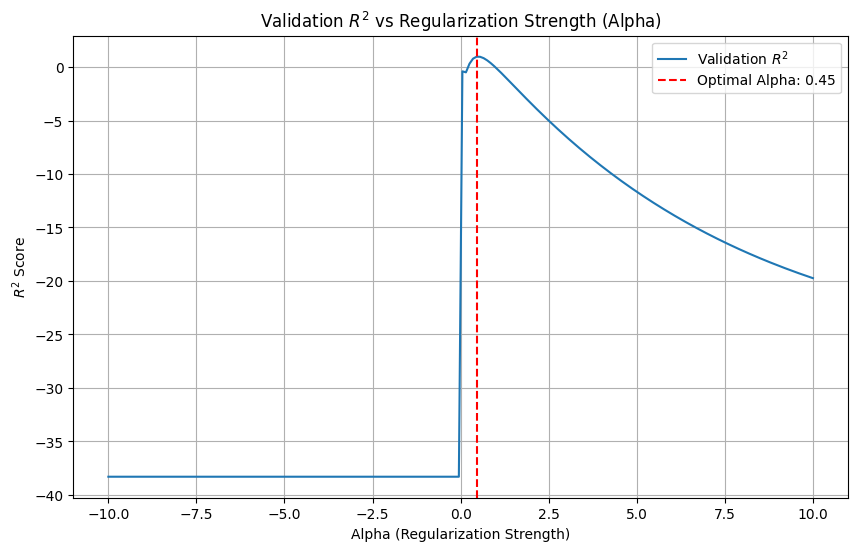

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Generate data
np.random.seed(2018)
x = np.arange(-10, 20, 0.5)
y = x**4 / 100 + x**3 / 20 + x**2 / 3 + 2 * x + np.random.normal(loc=0, scale=3, size=60)
data2 = pd.DataFrame({'x': x, 'y': y})

# Add polynomial features
M = 10
for p in range(2, M+1):
    data2[f'x{p}'] = data2['x']**p

# Split into train, validation, and test sets
data2_Train = data2.loc[0:39]
data2_Valid = data2.loc[40:49]
data2_Test = data2.loc[50:59]

# Separate features and targets
X_train = data2_Train.drop(columns=['y'])
y_train = data2_Train['y']
X_valid = data2_Valid.drop(columns=['y'])
y_valid = data2_Valid['y']
X_test = data2_Test.drop(columns=['y'])
y_test = data2_Test['y']

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Perform hyperparameter tuning using np.linspace(-10, 10, 200)
alphas = np.linspace(-10, 10, 200)  # Linear range of alpha values
validation_R2_scores = []
best_alpha = None
best_R2 = -np.inf

# Loop through alphas to find the best one
for alpha in alphas:
    alpha = max(0, alpha)  # Ensure non-negative alpha for Ridge
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_valid_pred = model.predict(X_valid_scaled)
    R2 = r2_score(y_valid, y_valid_pred)
    validation_R2_scores.append(R2)
    if R2 > best_R2:
        best_R2 = R2
        best_alpha = alpha

# Print the optimal alpha and best R2
print(f"Optimal alpha for Ridge={best_alpha}, Best Validation R^2={best_R2:.4f}")

# Test set evaluation with best alpha
model = Ridge(alpha=best_alpha)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
test_R2 = r2_score(y_test, y_test_pred)

print(f"Test R^2 with Optimal Alpha: {test_R2:.4f}")

# Plot the Validation R^2 vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, validation_R2_scores, label="Validation $R^2$")
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Optimal Alpha: {best_alpha:.2f}')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('$R^2$ Score')
plt.title('Validation $R^2$ vs Regularization Strength (Alpha)')
plt.legend()
plt.grid(True)
plt.show()



Q3 Standardize the data

If you noticed the problem with the models above this could be related to the scale of the data. Regularization applies the same magnitude criteria to all the coefficients. While in case of a polynomial regression, regressors (powers of x) have totally different scale and so do the coefficients.

So in order to perform a fair normalization we need to bring regressors on the same scale (normalize) first before applying regularization.

So in this task standardize the data subtracting the sample mean and dividing by the standard deviation.

Important note: standardization involves learning the parameters - mean and standard deviation from the data. As we're only supposed to learn from the training data but never from validation or test samples the mean and standard deviation for the standardization need to be learned from the training data set; and then the standardizing transformation will be applied to validation and test sets as well using the same parameters. This way the resulting validation and test samples won't get exactly standardized, but the transform (which is part of the model) will use only the parameters learned from the training data


In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Generate data
np.random.seed(2018)
x = np.arange(-10, 20, 0.5)
y = x**4 / 100 + x**3 / 20 + x**2 / 3 + 2 * x + np.random.normal(loc=0, scale=3, size=60)
data2 = pd.DataFrame({'x': x, 'y': y})

# Add polynomial features
M = 10
for p in range(2, M+1):
    data2[f'x{p}'] = data2['x']**p

# Split into train, validation, and test sets
data2_Train = data2.loc[0:39]
data2_Valid = data2.loc[40:49]
data2_Test = data2.loc[50:59]

# Separate features and targets
X_train = data2_Train.drop(columns=['y'])
y_train = data2_Train['y']
X_valid = data2_Valid.drop(columns=['y'])
y_valid = data2_Valid['y']
X_test = data2_Test.drop(columns=['y'])
y_test = data2_Test['y']

# Standardize the data
# Learn mean and std from the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it
X_valid_scaled = scaler.transform(X_valid)     # Transform validation data using training mean and std
X_test_scaled = scaler.transform(X_test)       # Transform test data using training mean and std

# Print some details about standardization
print("Training Data (First 5 Rows, Scaled):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())
print("\nValidation Data (First 5 Rows, Scaled):")
print(pd.DataFrame(X_valid_scaled, columns=X_valid.columns).head())
print("\nTest Data (First 5 Rows, Scaled):")
print(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())

# Fit a Ridge Regression model as an example
alpha = 1  # Example regularization strength
model = Ridge(alpha=alpha)
model.fit(X_train_scaled, y_train)

# Predict and assess performance
y_valid_pred = model.predict(X_valid_scaled)
y_test_pred = model.predict(X_test_scaled)

valid_R2 = r2_score(y_valid, y_valid_pred)
test_R2 = r2_score(y_test, y_test_pred)

print(f"\nValidation R^2: {valid_R2:.4f}")
print(f"Test R^2: {test_R2:.4f}")

Training Data (First 5 Rows, Scaled):
          x        x2        x3        x4        x5        x6        x7  \
0 -1.689278  2.227724 -2.573992  2.969241 -3.208188  3.534305 -3.713390   
1 -1.602648  1.901716 -2.197464  2.280054 -2.463826  2.440401 -2.564476   
2 -1.516018  1.592426 -1.858555  1.691508 -1.860716  1.599450 -1.726429   
3 -1.429389  1.299854 -1.555285  1.193293 -1.377729  0.962323 -1.125736   
4 -1.342759  1.024001 -1.285676  0.775657 -0.995953  0.487423 -0.703507   

         x8        x9       x10  
0  3.991419 -4.130666  4.369902  
1  2.477226 -2.564188  2.436657  
2  1.429224 -1.535424  1.231900  
3  0.718523 -0.875349  0.500523  
4  0.247420 -0.462710  0.069320  

Validation Data (First 5 Rows, Scaled):
          x        x2        x3        x4        x5         x6         x7  \
0  1.775907  2.227724  2.705992  2.969241  3.372711   3.534305   3.903820   
1  1.862537  2.570451  3.122121  3.769938  4.281801   4.938687   5.454305   
2  1.949166  2.929896  3.579829  4.


Q4. Next perform hyperparameter selection over the validation set using the standardized data. Assess the resulting model

Find the best alpha from np.linspace(-10,10,200) maximizing the validation R2 over the standardized data. Assess the performance of the model with the best alpha over the test set. Report the resulting coefficients. What is the degree of the resulting polynomial model and is it consistent with the original model used to generate the data above?

Note: the model's coefficient's apply to standardized data and this way may not be consistent with the original model. To bring the model on the original scale one may need to apply an inverse transform involving the standardization parameters, learned over the training data (not required in the task)


In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Generate data
np.random.seed(2018)
x = np.arange(-10, 20, 0.5)
y = x**4 / 100 + x**3 / 20 + x**2 / 3 + 2 * x + np.random.normal(loc=0, scale=3, size=60)
data2 = pd.DataFrame({'x': x, 'y': y})

# Add polynomial features
M = 10
for p in range(2, M+1):
    data2[f'x{p}'] = data2['x']**p

# Split into train, validation, and test sets
data2_Train = data2.loc[0:39]
data2_Valid = data2.loc[40:49]
data2_Test = data2.loc[50:59]

# Separate features and targets
X_train = data2_Train.drop(columns=['y'])
y_train = data2_Train['y']
X_valid = data2_Valid.drop(columns=['y'])
y_valid = data2_Valid['y']
X_test = data2_Test.drop(columns=['y'])
y_test = data2_Test['y']

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_valid_scaled = scaler.transform(X_valid)     # Transform validation data
X_test_scaled = scaler.transform(X_test)       # Transform test data

# Perform hyperparameter selection using np.linspace(-10, 10, 200)
alphas = np.linspace(-10, 10, 200)  # Linear range of alpha values
best_alpha = None
best_R2 = -np.inf
best_model = None

# Loop through alphas to find the best one
for alpha in alphas:
    alpha = max(0, alpha)  # Ensure non-negative alpha for Ridge
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_valid_pred = model.predict(X_valid_scaled)
    R2 = r2_score(y_valid, y_valid_pred)
    if R2 > best_R2:
        best_R2 = R2
        best_alpha = alpha
        best_model = model

# Print the optimal alpha and best R2
print(f"Optimal alpha for Ridge={best_alpha}, Best Validation R^2={best_R2:.4f}")

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_scaled)
test_R2 = r2_score(y_test, y_test_pred)
print(f"Test R^2 with Optimal Alpha: {test_R2:.4f}")

# Report coefficients of the model
coefficients = best_model.coef_
intercept = best_model.intercept_
print("\nModel Coefficients (Standardized Data):")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Determine the degree of the resulting polynomial model
nonzero_coefficients = np.sum(np.abs(coefficients) > 1e-5)  # Count non-zero coefficients
polynomial_degree = nonzero_coefficients - 1  # Subtract 1 for the intercept
print(f"\nDegree of the resulting polynomial model: {polynomial_degree}")

# Check consistency with the original model
original_degree = 4  # Degree of the original polynomial model
is_consistent = polynomial_degree == original_degree
print(f"Is the degree consistent with the original model? {is_consistent}")

Optimal alpha for Ridge=0.45226130653266416, Best Validation R^2=0.9620
Test R^2 with Optimal Alpha: -48.9524

Model Coefficients (Standardized Data):
Intercept: 29.45596706020831
Coefficients: [12.35510914 14.76633949 13.20598193 14.47522466  5.3407538   8.45563034
  0.64051032  2.56086558 -0.83770242 -2.31076041]

Degree of the resulting polynomial model: 9
Is the degree consistent with the original model? False
